In [42]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pypair.contingency import BinaryTable

In [43]:
ds = pd.read_csv('../data/r_1_SPB_clear_w_time_to_m.csv',index_col=0)

In [44]:
ds.columns

Index(['id', 'floor', 'floors_count', 'total_meters', 'price_per_month',
       'district', 'underground', 'Холодильник', 'Стиральная машина',
       'Телевизор', 'Посудомоечная машина', 'Кондиционер', 'Интернет',
       'Площадь кухни', 'Высота потолков', 'Санузел', 'Балкон/лоджия',
       'Вид из окон', 'Ремонт', 'Год постройки', 'Тип дома', 'Парковка',
       'adress', 'time_to_rent', 'm_lat', 'm_long', 'a_lat', 'a_long',
       'time_to_metro'],
      dtype='object')

In [45]:
ds = ds.drop(['district','underground','id','m_lat','m_long','a_lat','a_long','adress'],axis = 1)

In [46]:
bin_cols = list(ds.nunique()[ds.nunique() == 2].index)
num_cols = list(ds.drop(bin_cols,axis =1).select_dtypes(include = 'number').columns)
non_cat_cols = num_cols.copy()
non_cat_cols.extend(bin_cols)
cat_cols = list(ds.drop(non_cat_cols,axis =1).columns)

In [47]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder() ,cat_cols),
        ('num', 'passthrough', num_cols),
        ('bin','passthrough',bin_cols)
    ])

In [48]:
ds.price_per_month = np.log(ds.price_per_month.values)

In [49]:
ds['time_to_metro'] = ds['time_to_metro'].apply(lambda x: round(x))

In [50]:
ds_norm = preprocessor.fit_transform(ds)
ds_norm.shape

(815, 37)

In [52]:
col_names = []
for item in preprocessor.get_feature_names_out():
    col_names.append(item.split('__')[1])
ds_ = pd.DataFrame(ds_norm,columns=col_names)

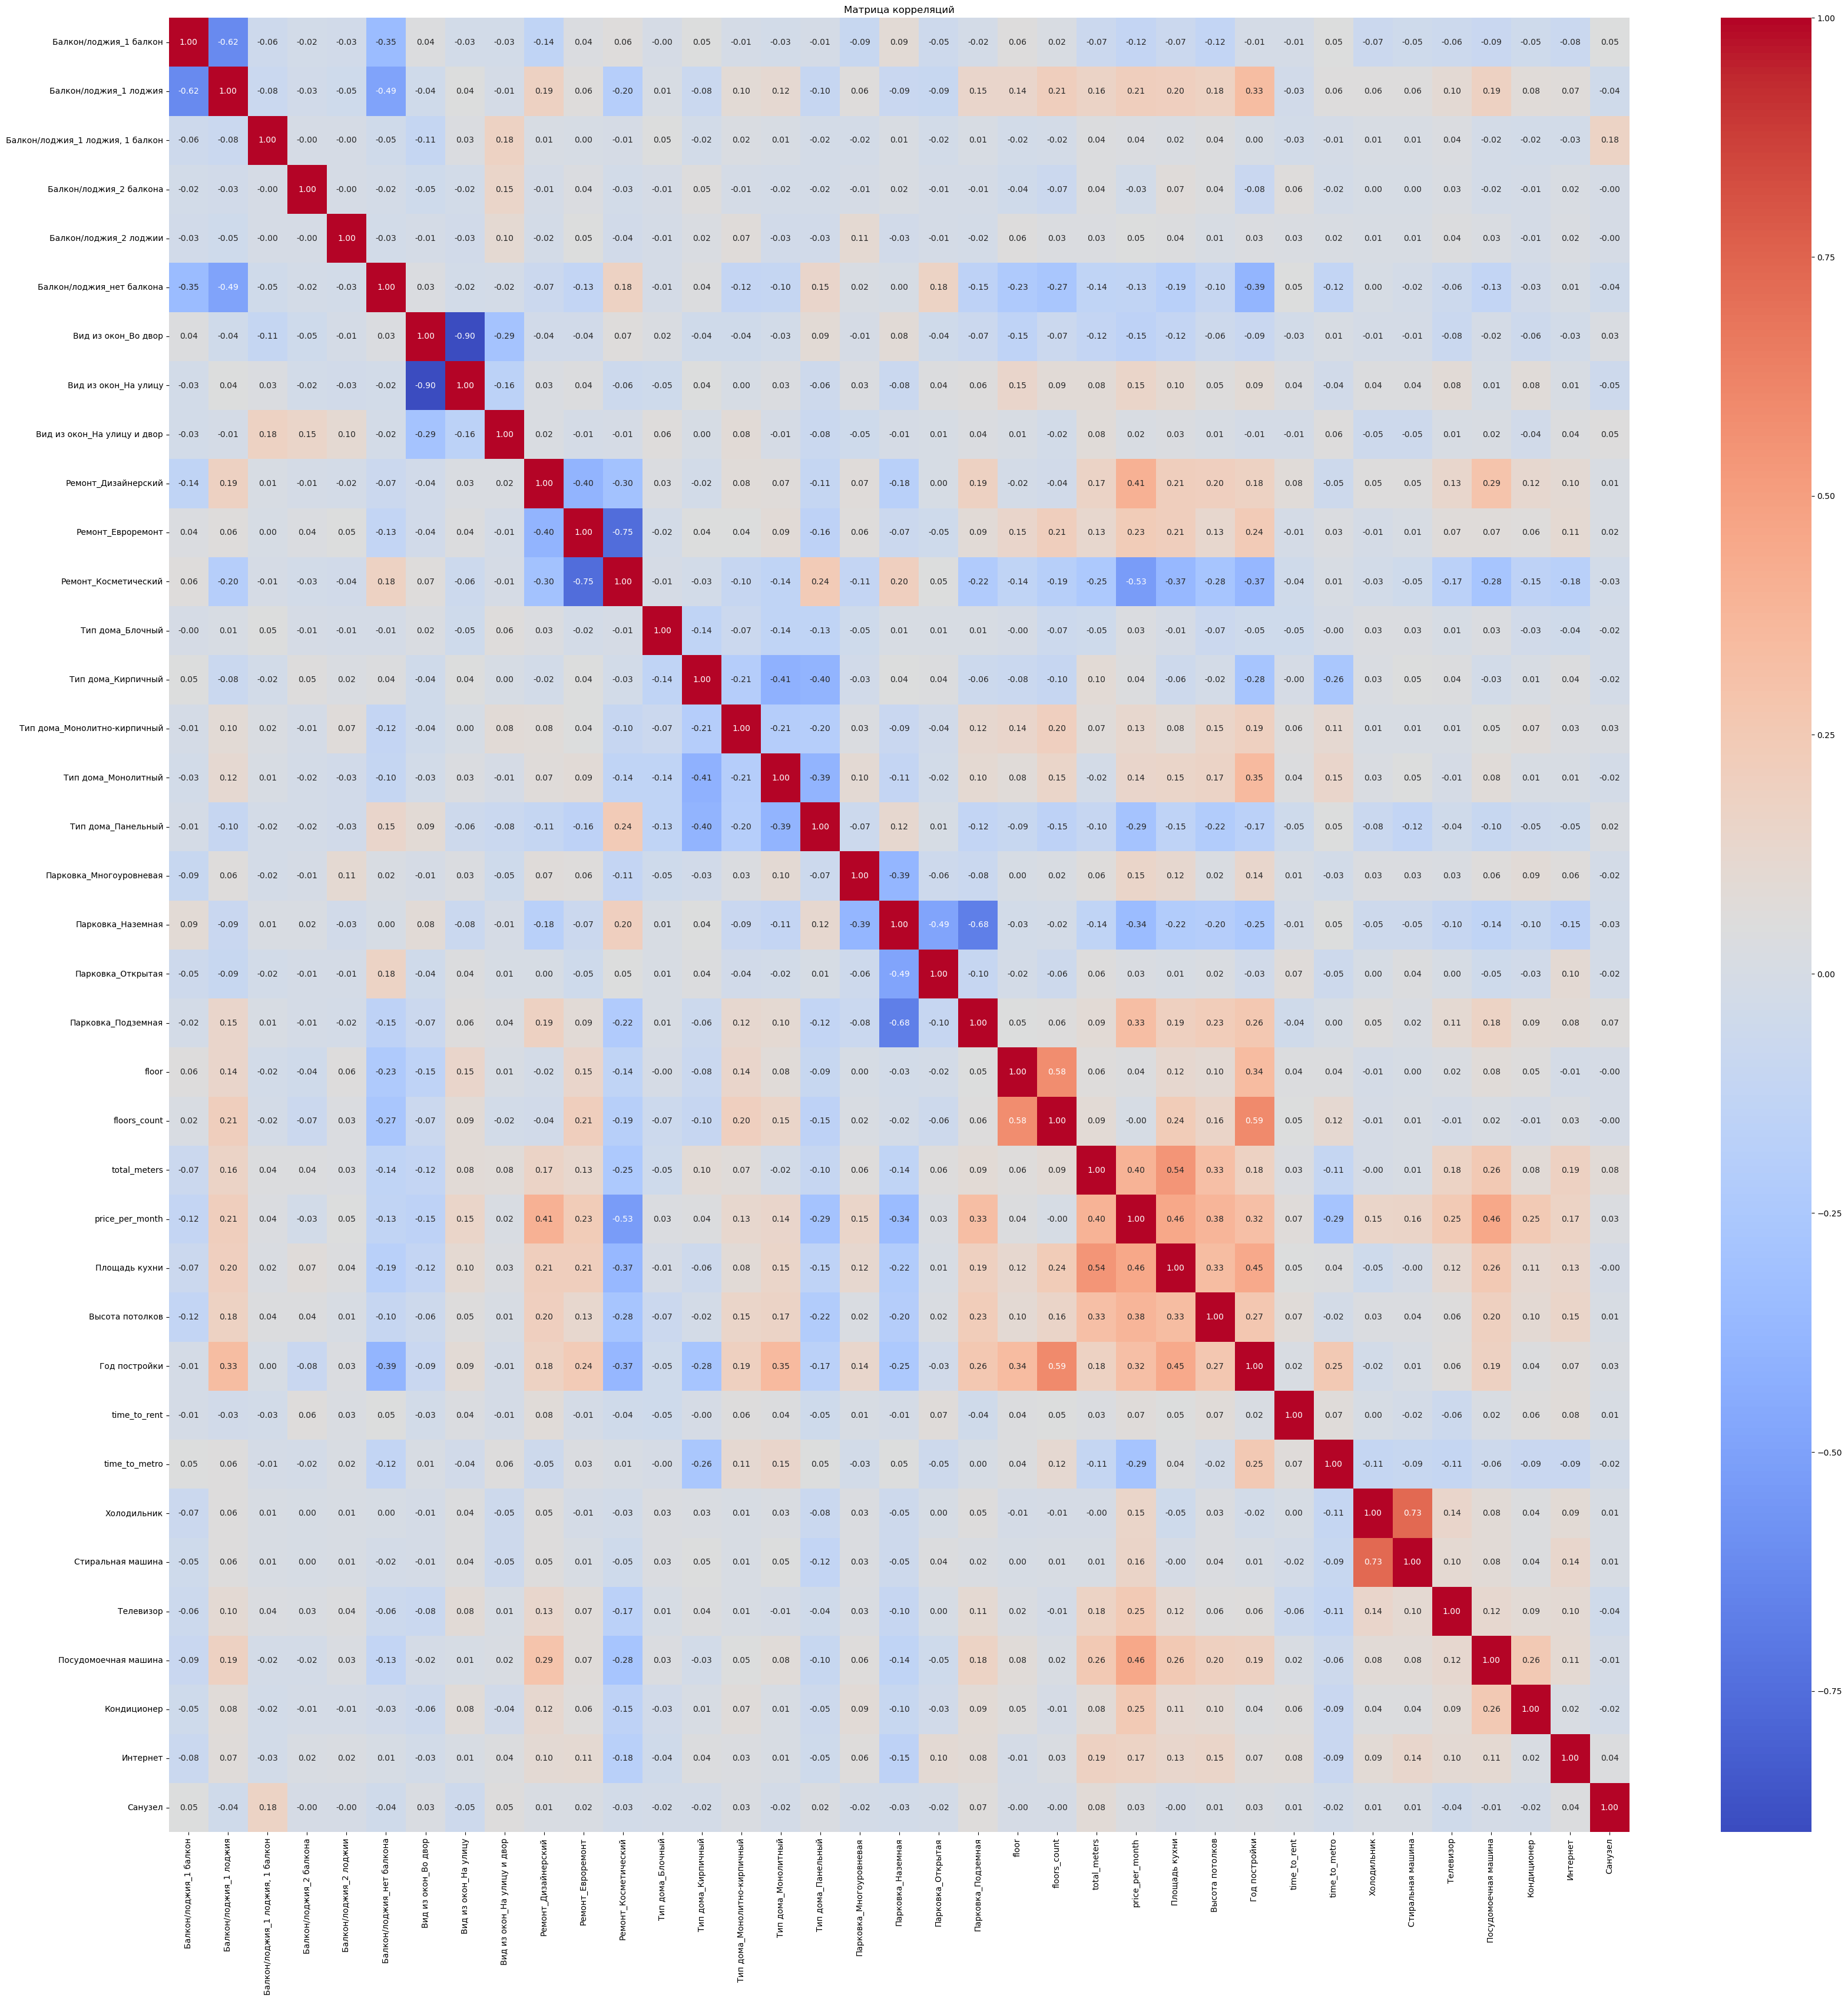

In [54]:
plt.figure(figsize=(40,40))
corr_matrix = ds_.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.savefig('../analisis/corr_matrix_no_loc_person.png')

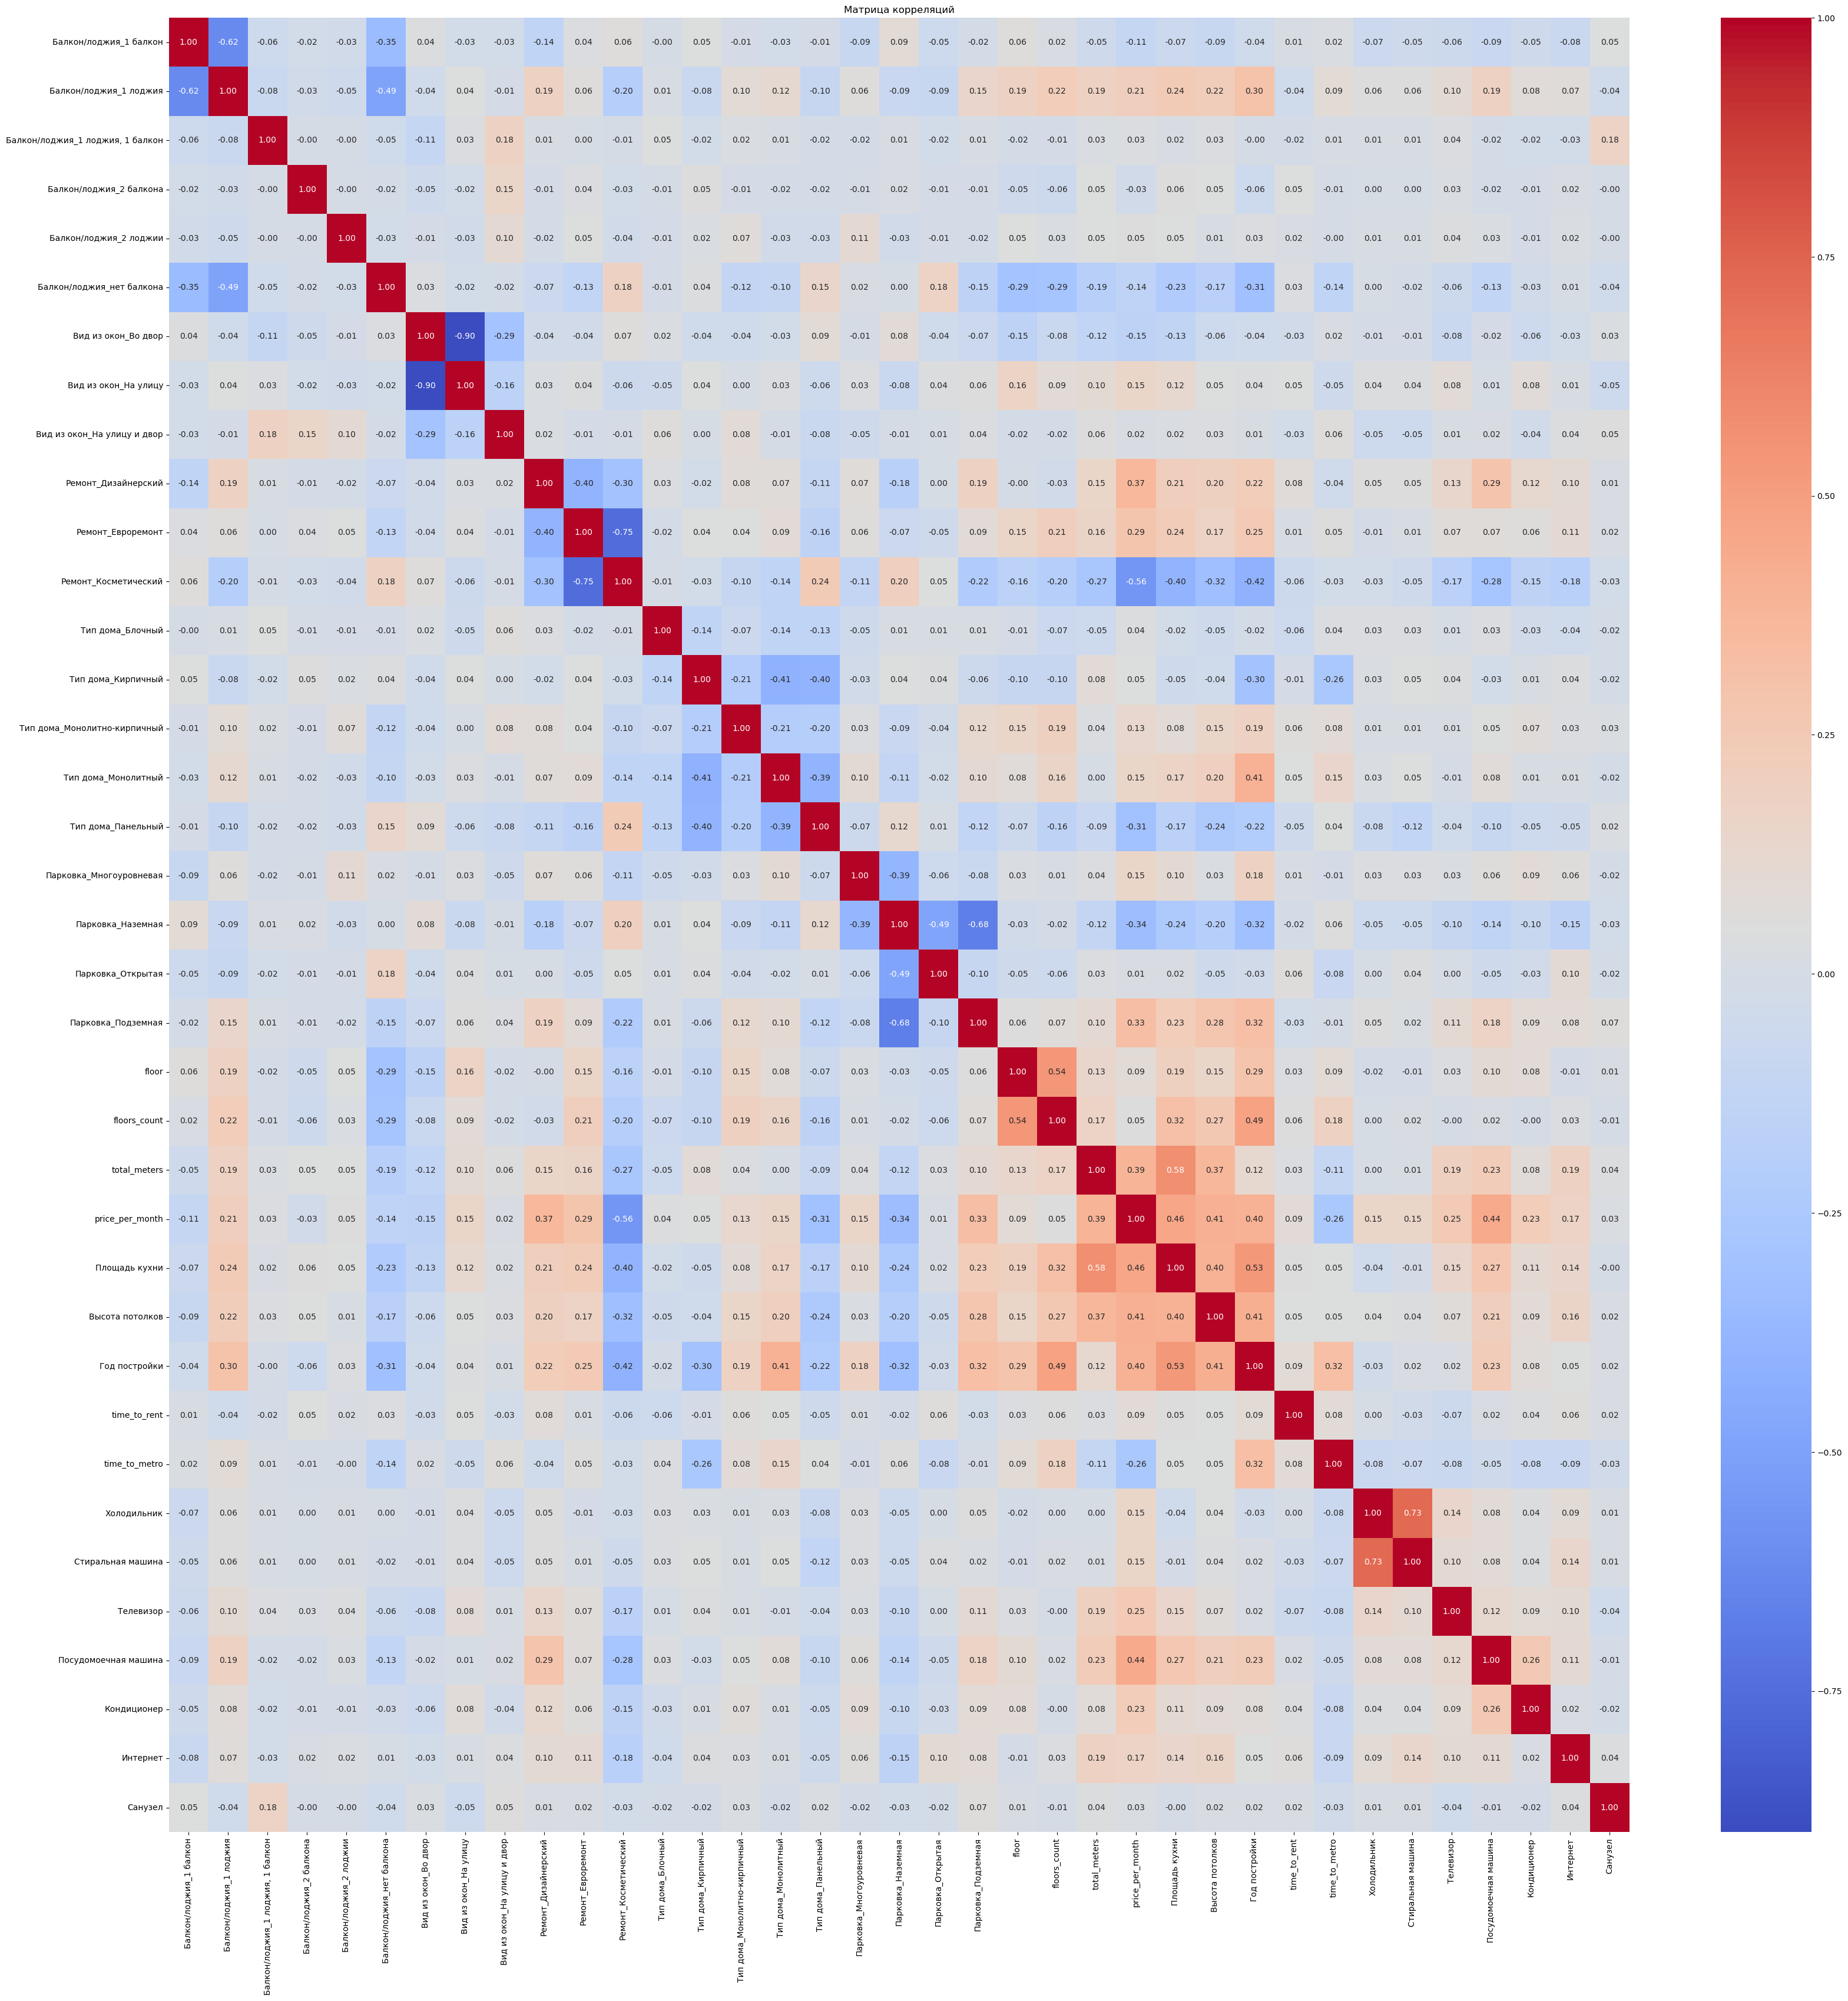

In [55]:
plt.figure(figsize=(40,40))
corr_matrix = ds_.corr(method='spearman')
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.savefig('../analisis/corr_matrix_no_loc_spearman.png')

Наблюдается корреляция между бинарными представлениями категориальных переменных, что ожидаемо.
Положительная корреляция между годом и ценой, годом постройки, высотой потолков, площадью кухни, общей площадью и наличием стиралки
Отрицательная между ценой и временем до метро, наземной парковкой, космеическим ремонтом и панельными домами.

При этом время на аренду почти ни с чем не коррелирует, что скорее всего говорит о том, что наблюдения проходили недостатчно долго

In [56]:
def tetrachoric_corr(x,y):
    bin_table = BinaryTable(x,y)
    return bin_table.tetrachoric

In [57]:
ds = pd.read_csv('../data/r_1_SPB_clear_w_time_to_m.csv',index_col=0)

In [58]:
ds = ds[['district','underground']]

In [59]:
cat_cols = ds.columns

In [60]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder() ,cat_cols)
    ])

In [61]:
ds_norm = preprocessor.fit_transform(ds)
ds_norm.shape

(815, 59)

In [62]:
col_names = []
for item in preprocessor.get_feature_names_out():
    col_names.append(item.split('__')[1])
ds_ = pd.DataFrame(ds_norm.toarray(),columns=col_names)

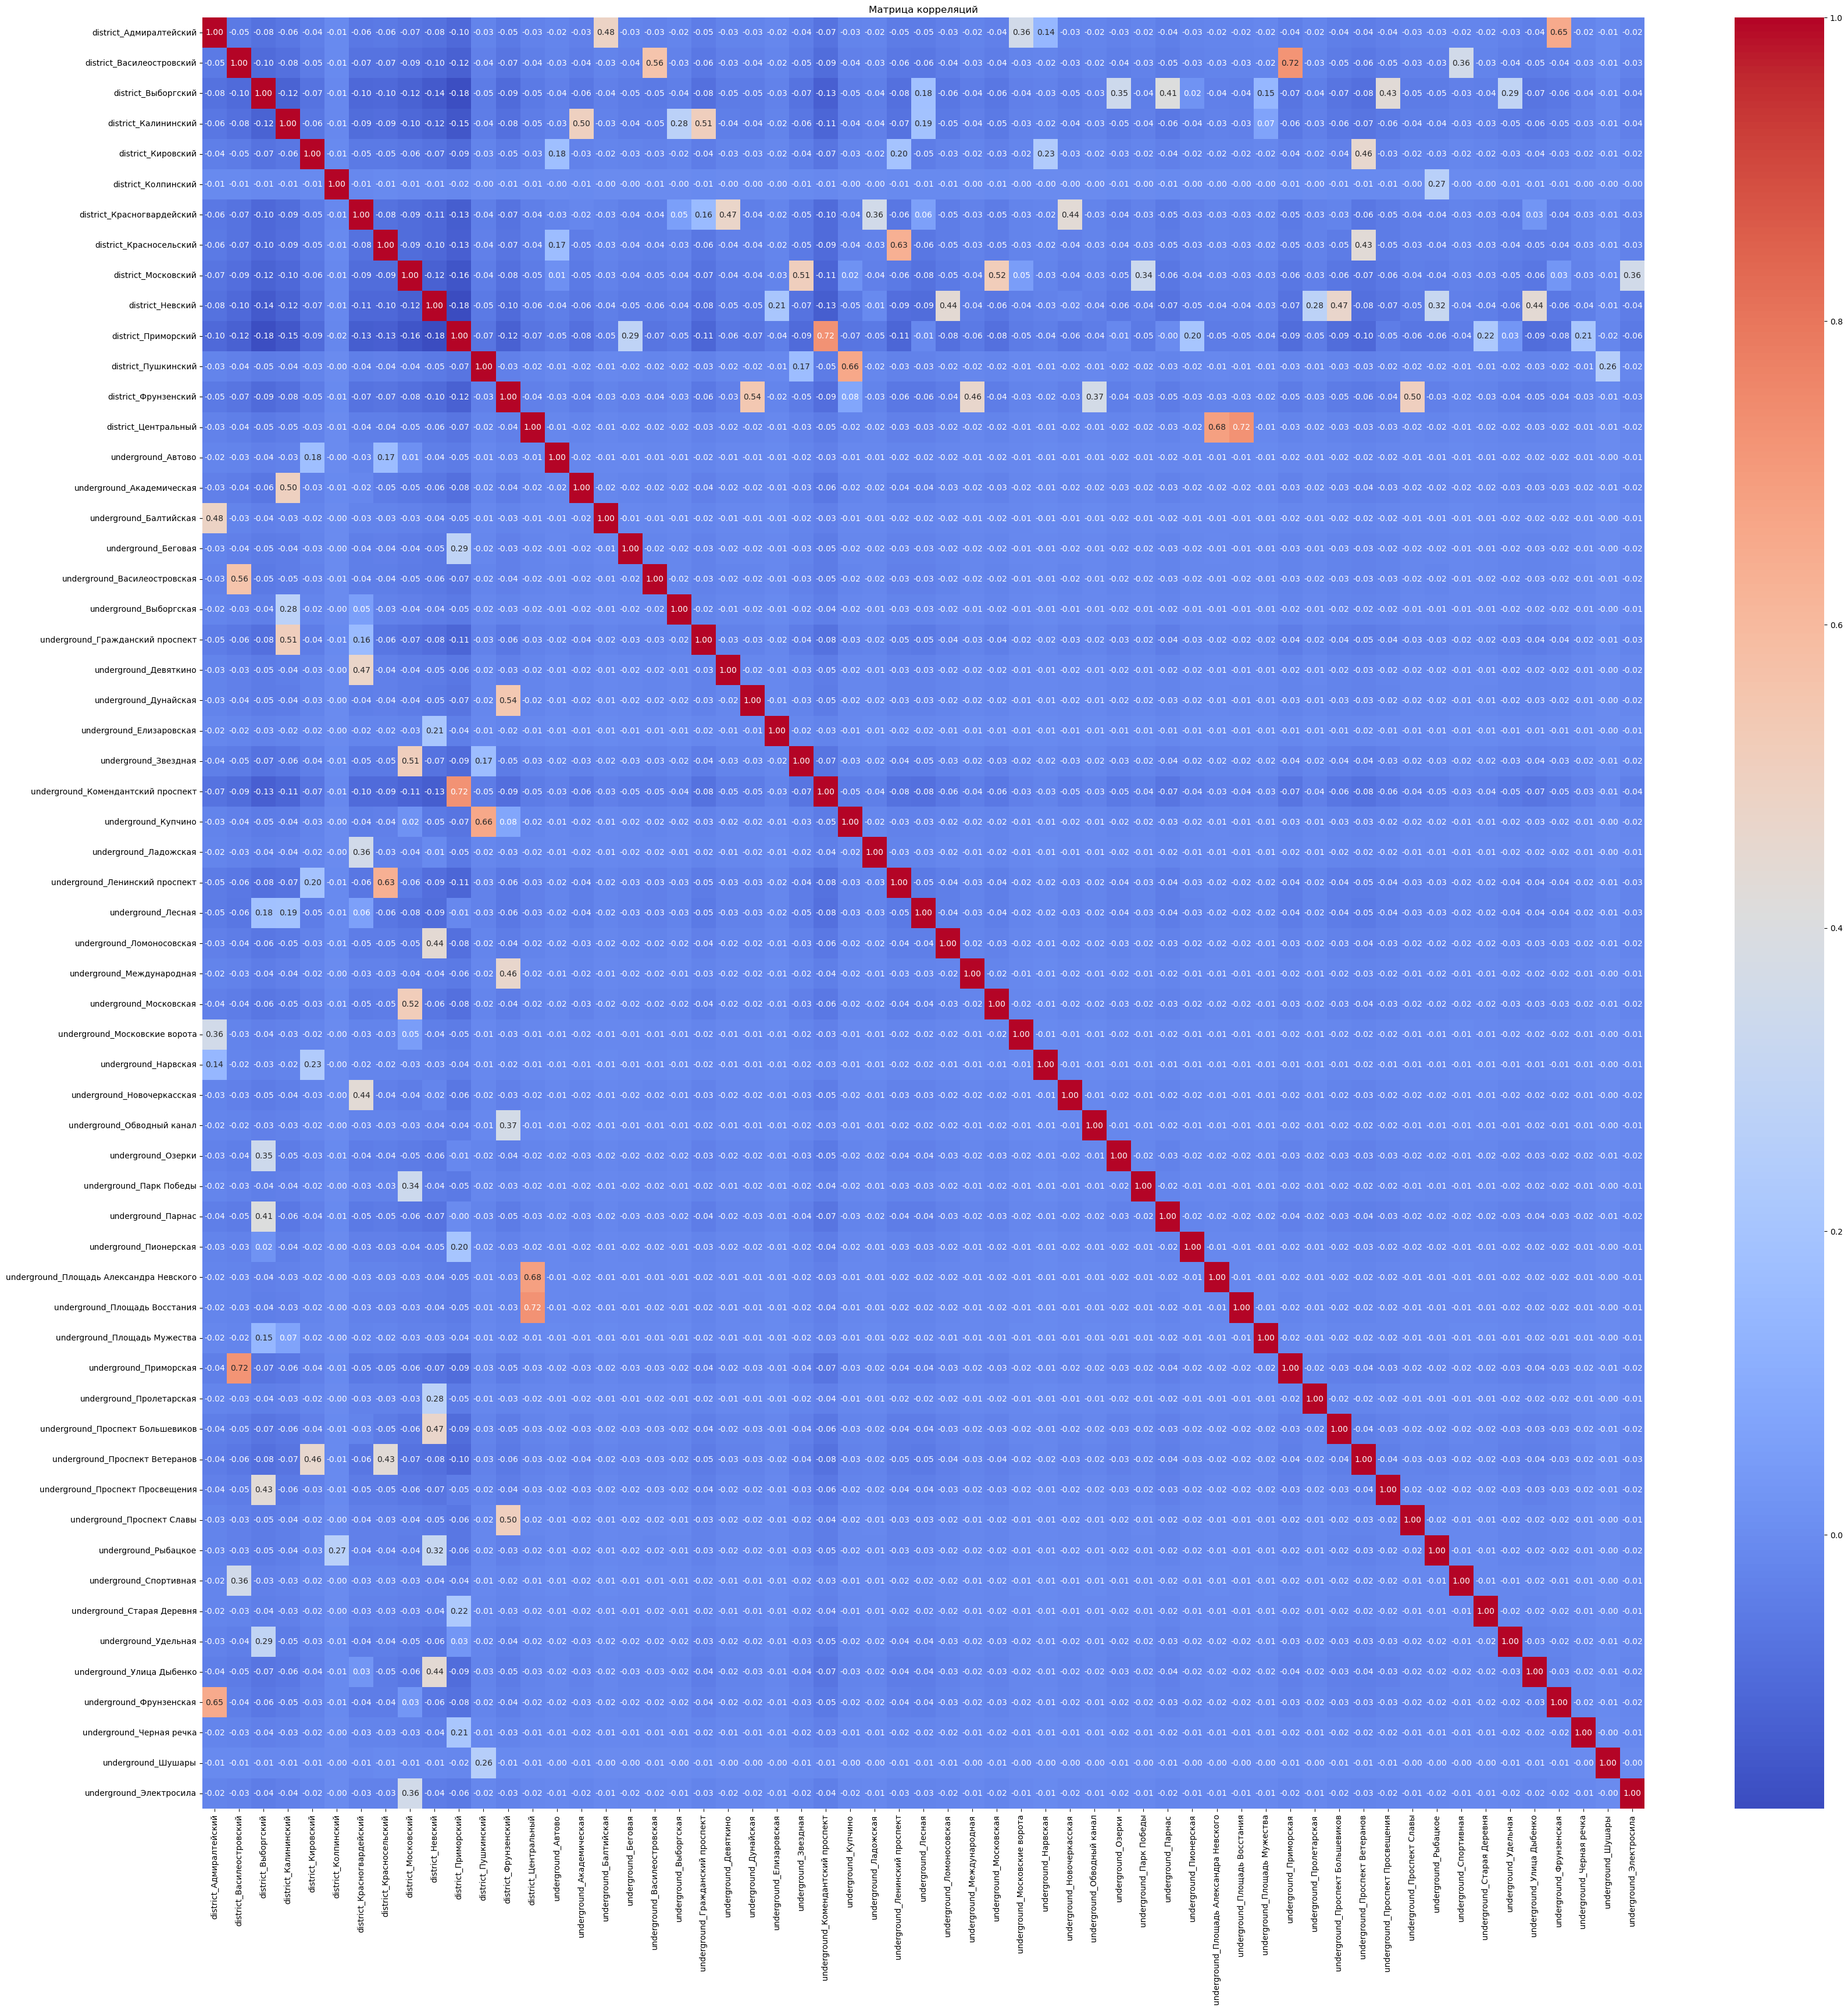

In [63]:
plt.figure(figsize=(40,40))
corr_matrix = ds_.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.savefig('../analisis/corr_matrix_loc_person.png')

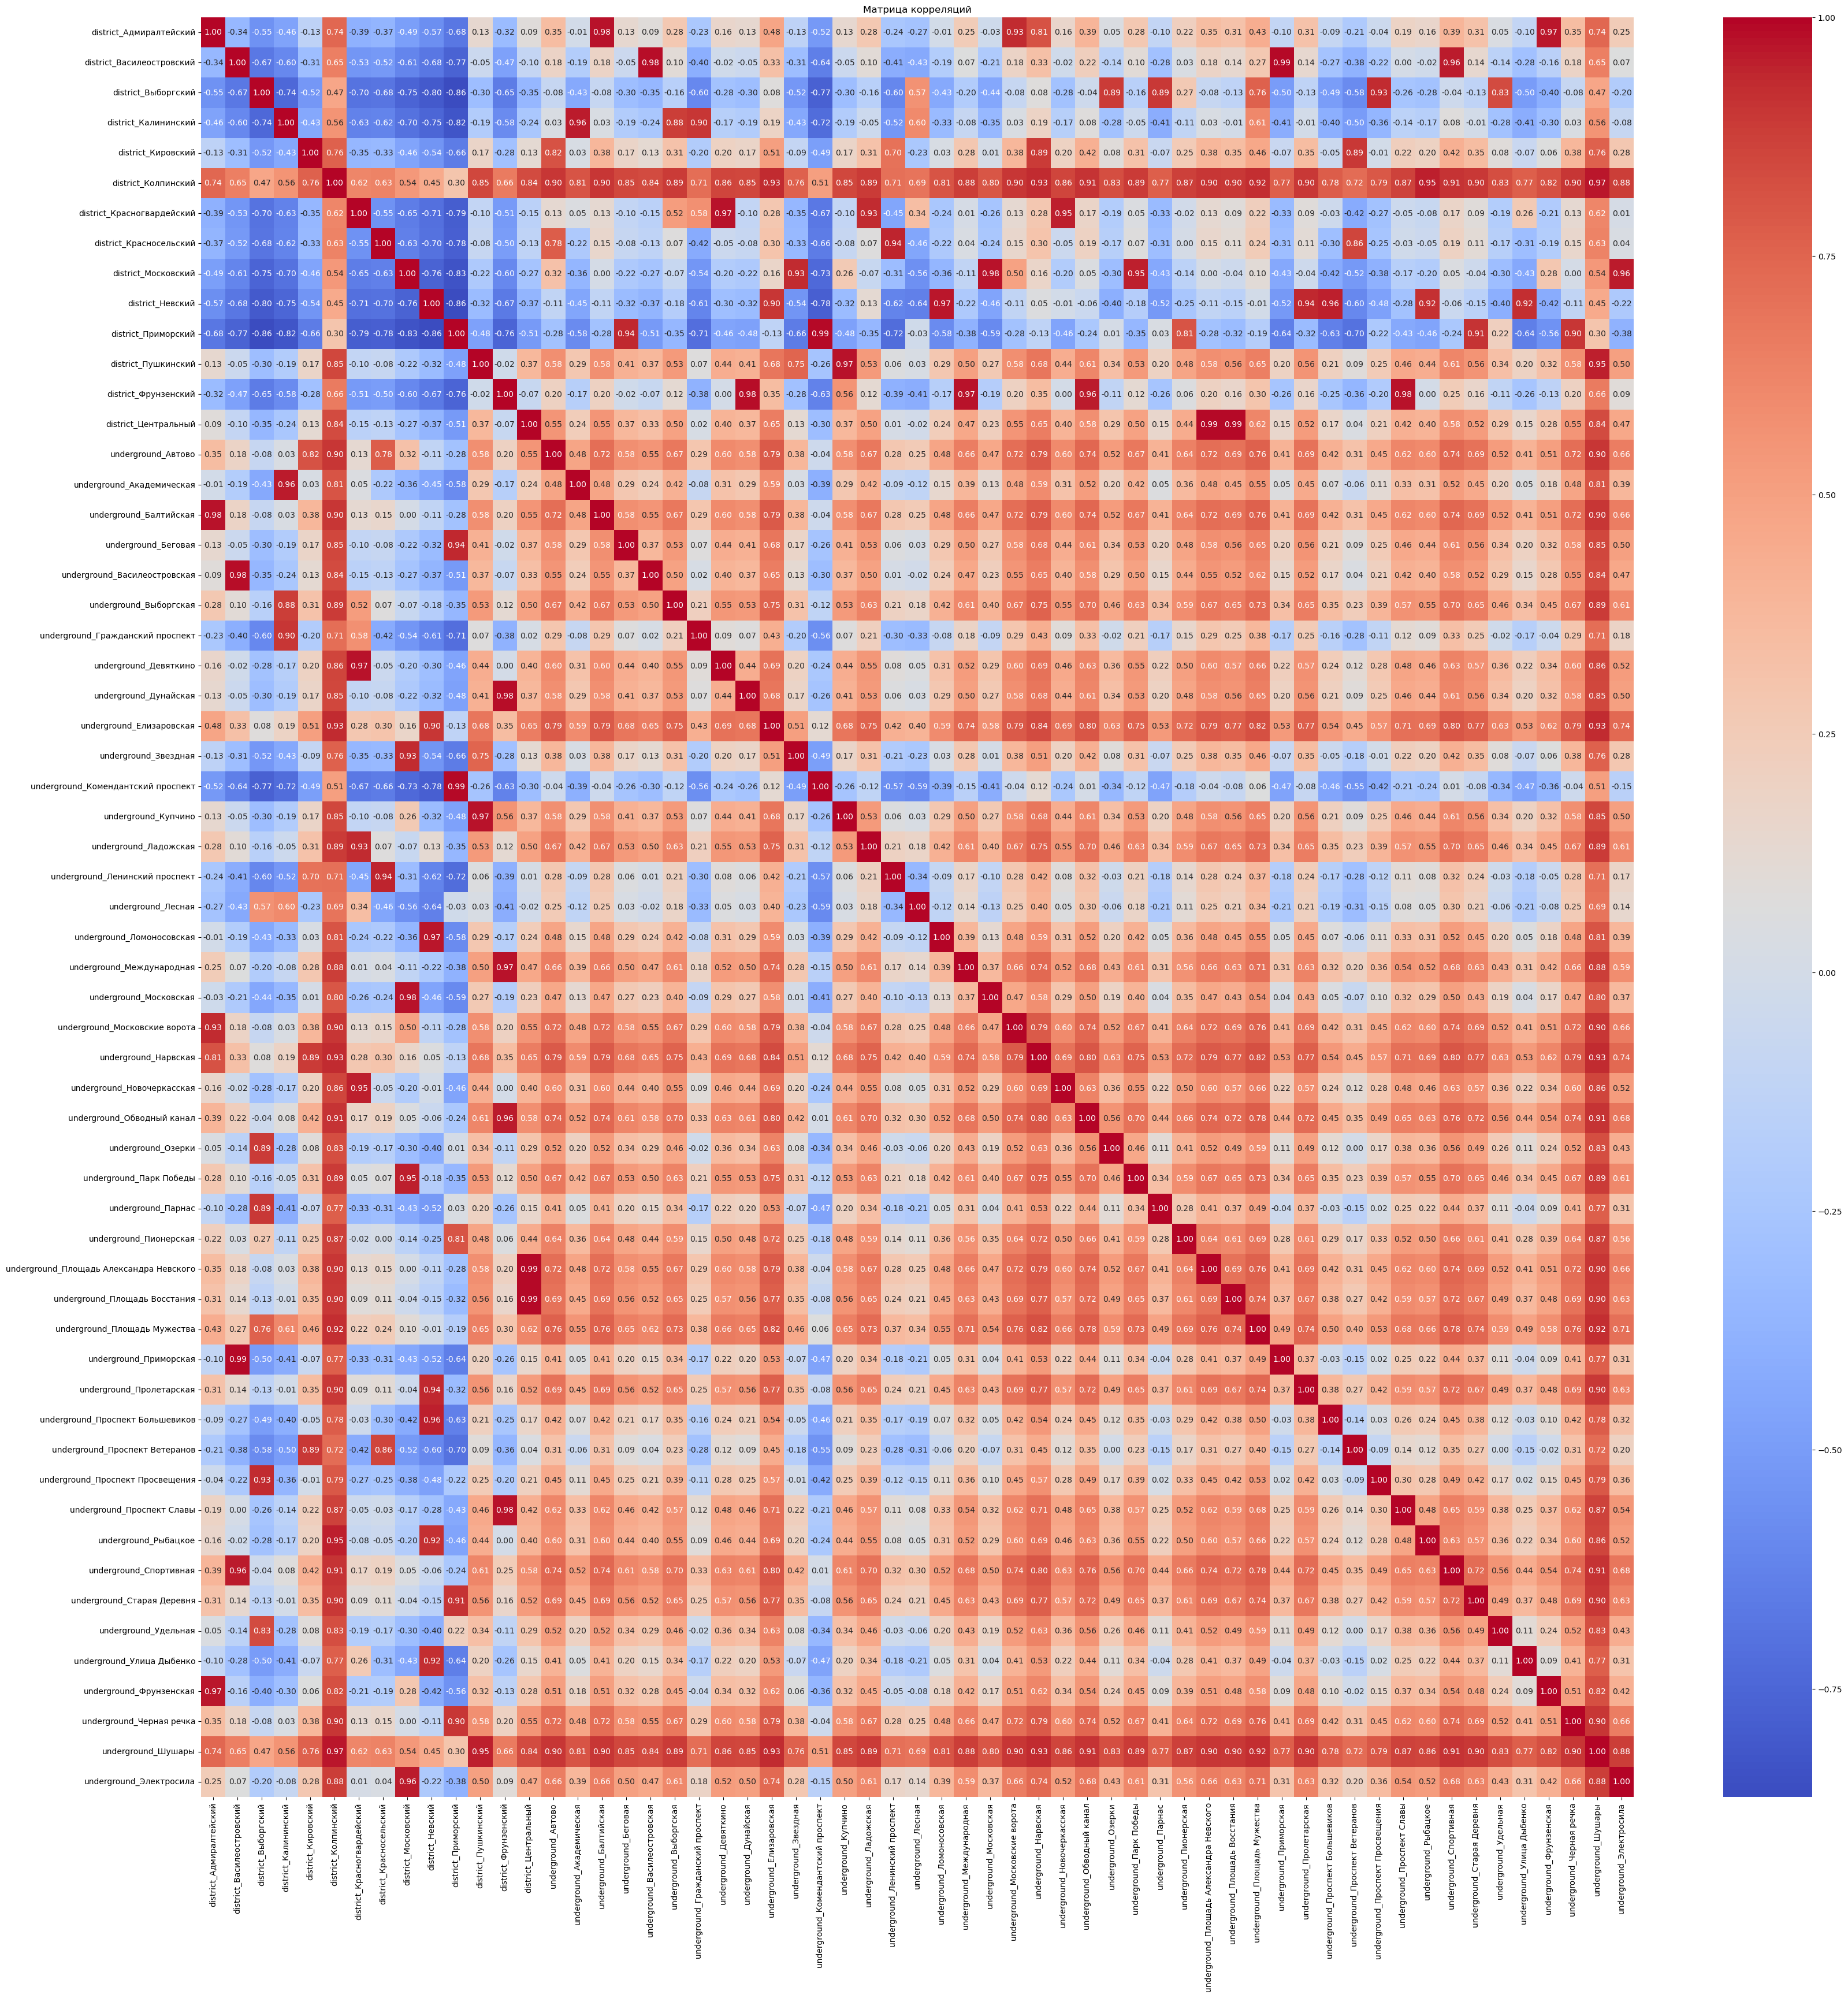

In [64]:
plt.figure(figsize=(40,40))
corr_matrix = ds_.corr(method=tetrachoric_corr)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.savefig('../analisis/corr_matrix_loc_tetra.png')

Набдюдается сильная корреляция между станциями метро и районами в которых они расположены, поэтому с учетом того, что районы несут меньше информации о рассположении, чем метро, разумно их удалить, с другой стороны, что у того, что другого большая корреляция между собой(одно метро с другим, один район с другим) и так районов меньше, то это должно вызвать меньше проблем, так что следует попробовать и то и то.

In [79]:
ds = pd.read_csv('../data/r_1_SPB_clear_w_time_to_m.csv',index_col=0)

In [80]:
ds.columns

Index(['id', 'floor', 'floors_count', 'total_meters', 'price_per_month',
       'district', 'underground', 'Холодильник', 'Стиральная машина',
       'Телевизор', 'Посудомоечная машина', 'Кондиционер', 'Интернет',
       'Площадь кухни', 'Высота потолков', 'Санузел', 'Балкон/лоджия',
       'Вид из окон', 'Ремонт', 'Год постройки', 'Тип дома', 'Парковка',
       'adress', 'time_to_rent', 'm_lat', 'm_long', 'a_lat', 'a_long',
       'time_to_metro'],
      dtype='object')

In [ ]:
ds_mini = ds['price_per_month']

In [74]:
ds = ds['district'].to_frame()

In [76]:
cat_cols = ds.columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder() ,cat_cols)
    ])
ds_norm = preprocessor.fit_transform(ds)
ds_norm.shape


(815, 14)

In [77]:
col_names = []
for item in preprocessor.get_feature_names_out():
    col_names.append(item.split('__')[1])
ds_ = pd.DataFrame(ds_norm.toarray(),columns=col_names)

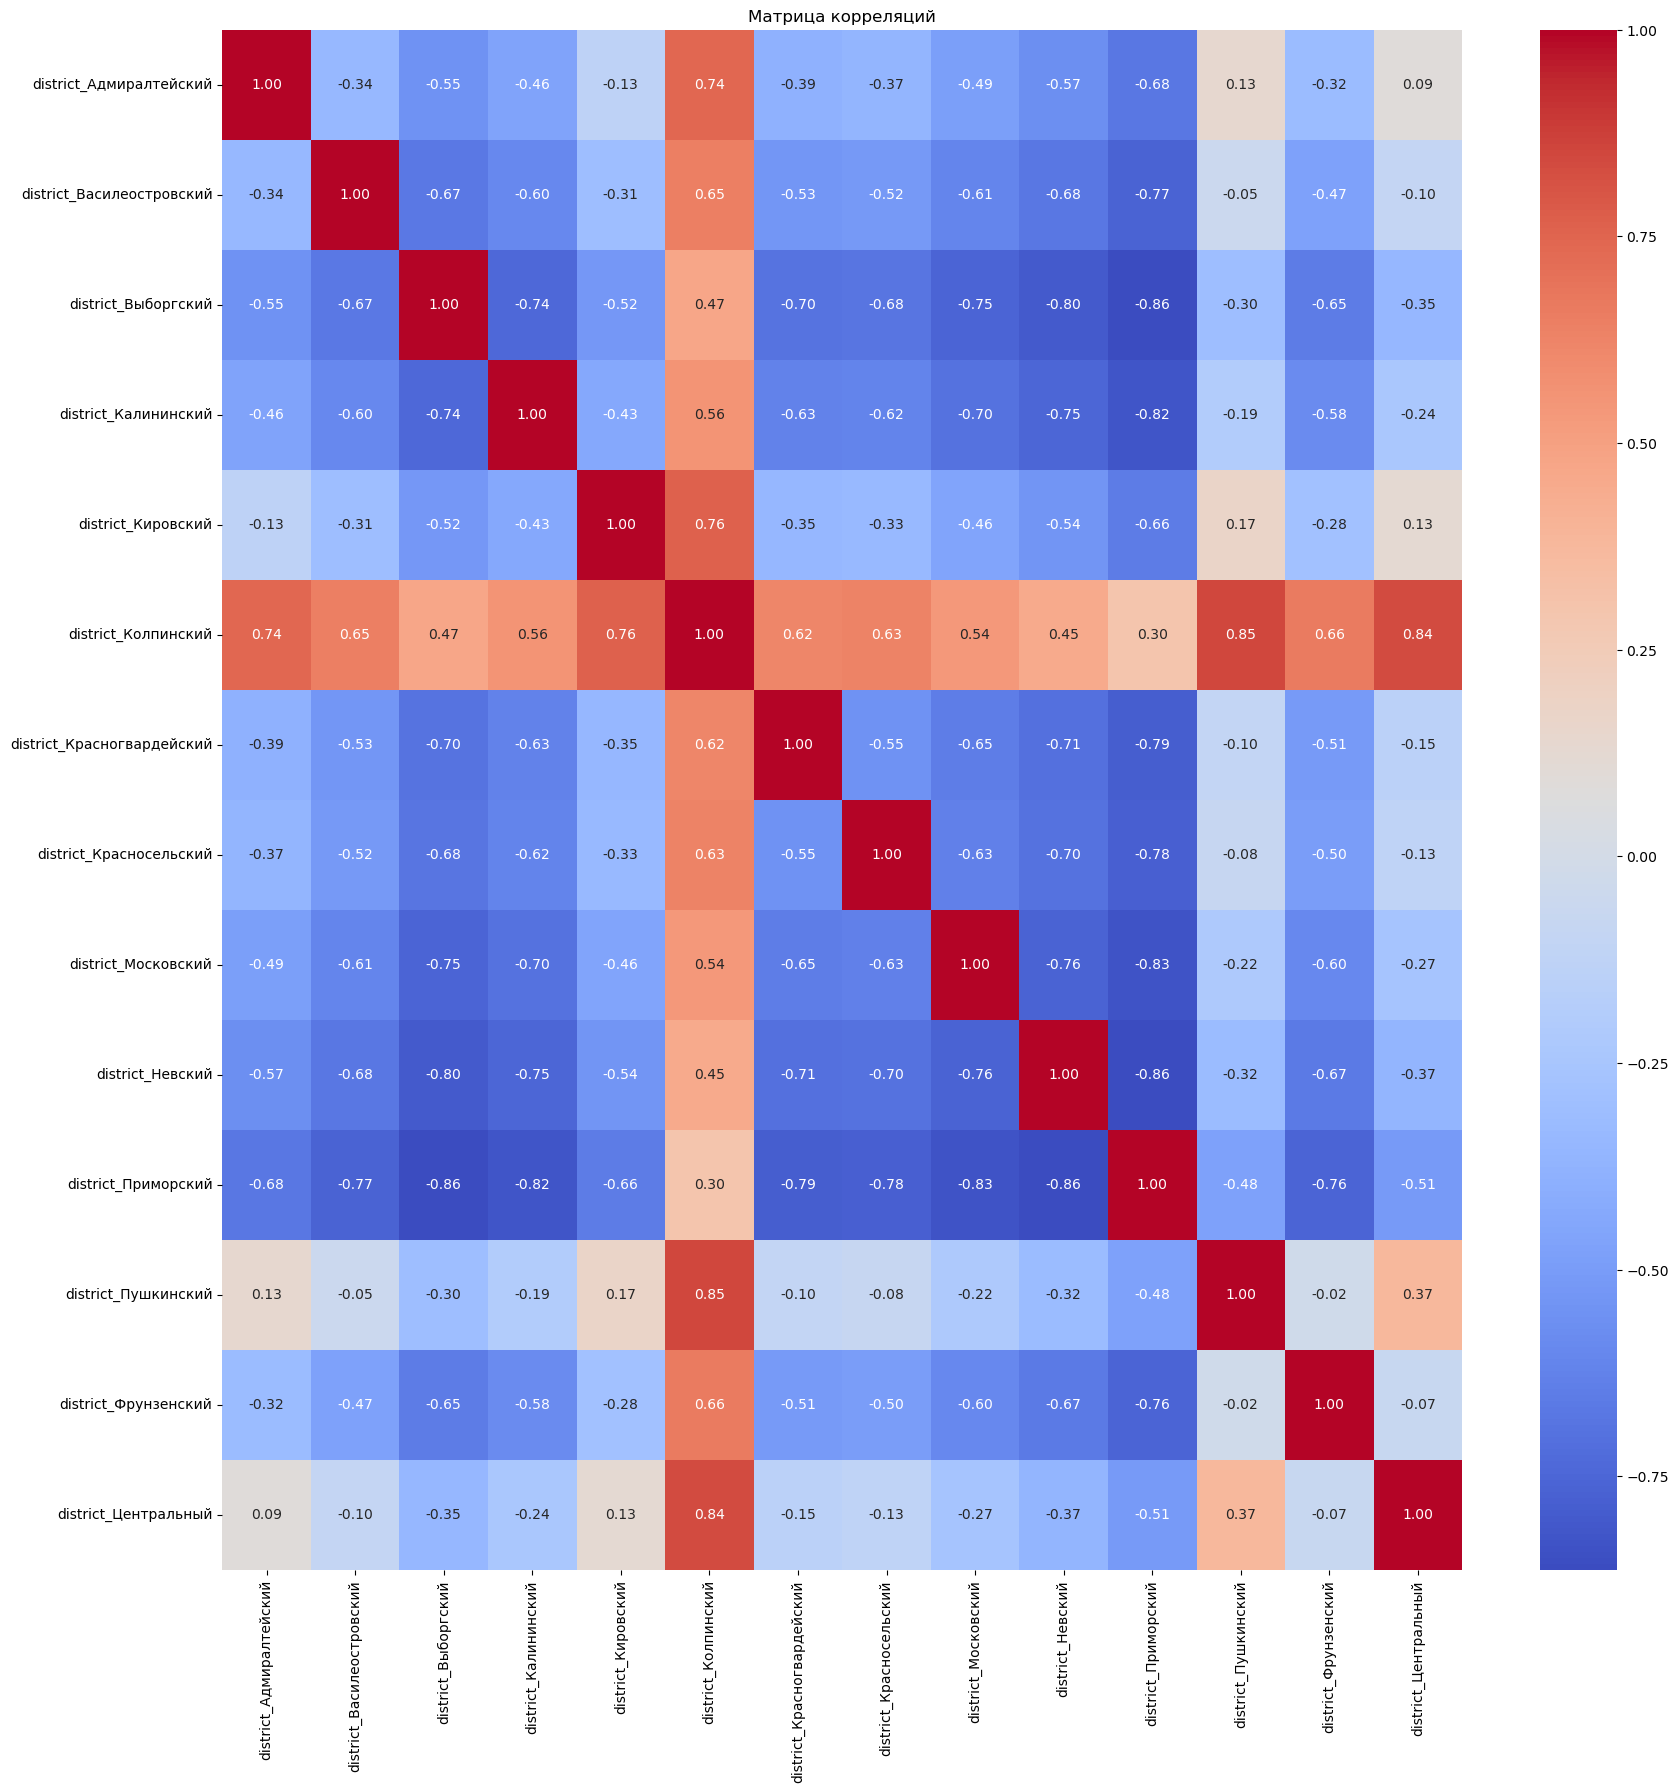

In [78]:
plt.figure(figsize=(20,20))
corr_matrix = ds_.corr(method=tetrachoric_corr)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций')
plt.savefig('../analisis/corr_matrix_district_tetra.png')